# "Analyzing Taxi Ride Patterns and Weather Impact in Chicago: An Exploratory Data Analysis and Hypothesis Testing"

<B>  Project Introduction </B>


This project involves analyzing taxi ride data from Chicago to uncover patterns in ride frequency, duration, and the impact of weather conditions on taxi services. The analysis is conducted in two primary phases: exploratory data analysis (EDA) and hypothesis testing.

<b> Phase 1: Exploratory Data Analysis (EDA)</b>

In the first phase, we work with two datasets:

Taxi Ride Data by Company:

This dataset contains information on the number of rides completed by various taxi companies in Chicago on November 15-16, 2017.
Our objective is to analyze the distribution of rides among different companies and visualize which companies had the most activity during this period.
Neighborhood Drop-off Data:

This dataset provides the average number of rides that ended in various Chicago neighborhoods throughout November 2017.
The goal here is to identify the top 10 neighborhoods by the number of drop-offs, and explore trends that may indicate high-demand areas within the city.
The insights derived from this phase will help us understand the market dynamics of taxi services in Chicago, including which companies dominate and which neighborhoods are the most popular drop-off locations.

<b> Phase 2: Hypothesis Testing </b>
In the second phase, we focus on a specific hypothesis regarding the duration of taxi rides:

Hypothesis: "The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays."
We will analyze ride data, specifically focusing on whether weather conditions, particularly rain, have a statistically significant effect on the duration of these rides on Saturdays. This phase involves the application of statistical testing to determine if there is a significant difference in ride duration between rainy and non-rainy Saturdays.

<b>Overall Objective </b>

The project aims to provide actionable insights for taxi companies operating in Chicago. By understanding ride distribution patterns and the impact of external factors like weather on ride duration, these companies can optimize their services, improve customer satisfaction, and potentially increase revenue.








# Exploratory Data Analysis (EDA)

In [1]:
#import the files 
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats


In [2]:
# Load the datasets
project_sql_result_01 = pd.read_csv('/datasets/project_sql_result_01.csv')
project_sql_result_04 = pd.read_csv('/datasets/project_sql_result_04.csv')

# Study the data:

In [3]:
# Display basic information about the datasets
print(project_sql_result_01.info())
print(project_sql_result_04.info())

# Display the first few rows of each dataset
print(project_sql_result_01.head())
print(project_sql_result_04.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB
None
                      company_name  trips_amount
0                        Flash Cab         19558
1        Taxi Affiliation Services         11422
2                Medallion Leasing         10367
3                       Yellow Cab          9888
4  Taxi Affiliation Service Yellow          9299
  dropoff_loca

<b>Intermediate Conclusion:</b>

The project_sql_result_01 dataset contains 64 entries, with two columns: company_name and trips_amount. There are no missing values, and the data types appear to be correct (strings for company names and integers for the number of trips).
The project_sql_result_04 dataset contains 94 entries, with two columns: dropoff_location_name and average_trips. Similarly, there are no missing values, and the data types are appropriate (strings for location names and floats for average trips).

# Duplicates Check

In [4]:
# Check for duplicates in project_sql_result_01
duplicates_01 = project_sql_result_01[project_sql_result_01.duplicated()]
print("Duplicate rows in project_sql_result_01:")
print(duplicates_01)

# Check for duplicates in project_sql_result_04
duplicates_04 = project_sql_result_04[project_sql_result_04.duplicated()]
print("Duplicate rows in project_sql_result_04:")
print(duplicates_04)




Duplicate rows in project_sql_result_01:
Empty DataFrame
Columns: [company_name, trips_amount]
Index: []
Duplicate rows in project_sql_result_04:
Empty DataFrame
Columns: [dropoff_location_name, average_trips]
Index: []


<b>Intermediate Conclusion:</b>

After checking both datasets for duplicates, I found that there are no duplicate rows in either project_sql_result_01 or project_sql_result_04. This confirms that the data is clean and ready for analysis.

# Ensure Data Types Are Correct

In [5]:
# Check data types
print(project_sql_result_01.dtypes)
print(project_sql_result_04.dtypes)


company_name    object
trips_amount     int64
dtype: object
dropoff_location_name     object
average_trips            float64
dtype: object


# Identify the Top 10 Neighborhoods in Terms of Drop-offs

In [6]:
# Sort the neighborhoods by average_trips and select the top 10
top_10_neighborhoods = project_sql_result_04.sort_values(by='average_trips', ascending=False).head(10)
print(top_10_neighborhoods)


  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667


# Make Graphs:

<Figure size 1200x800 with 0 Axes>

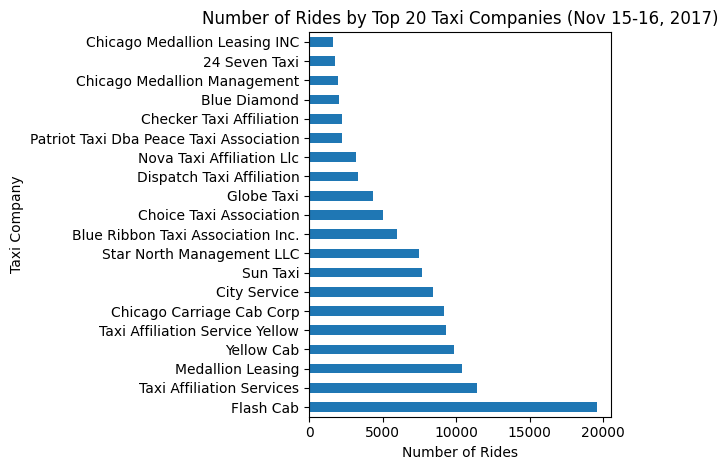

In [7]:


# Filter to display only the top 20 companies by number of rides
top_20_companies = project_sql_result_01.sort_values(by='trips_amount', ascending=False).head(20)

# Plot the graph
plt.figure(figsize=(12, 8))  # Adjust figure size if needed
ax = top_20_companies.plot(kind='barh', x='company_name', y='trips_amount', legend=False)

plt.title('Number of Rides by Top 20 Taxi Companies (Nov 15-16, 2017)')
plt.xlabel('Number of Rides')
plt.ylabel('Taxi Company')

plt.tight_layout()  # Adjust layout to ensure everything fits without overlapping
plt.show()



<b>Interpretation of the Graph: "Number of Rides by Top 20 Taxi Companies (Nov 15-16, 2017)" </b>


The graph shows a horizontal bar chart that represents the number of rides taken with the top 20 taxi companies in Chicago over the two-day period of November 15-16, 2017. Each bar corresponds to a different taxi company, with the length of the bar indicating the total number of rides.

Key Observations:

Dominance of Leading Companies:

Flash Cab: This company has the longest bar, indicating it had the highest number of rides during this period. This suggests that Flash Cab was the most popular or widely used taxi service, potentially due to a large fleet, brand recognition, or customer loyalty.

Taxi Affiliation Services: This company also has a significant number of rides, ranking second on the chart. This indicates it is another major player in the market, with substantial ride volume.

Distribution of Rides:

The distribution shows a sharp decline in the number of rides after the top few companies. This suggests that the market is somewhat concentrated, with a few companies capturing a large share of the total rides.
The other companies, while still making it into the top 20, have significantly fewer rides compared to the leaders. This could indicate that they are either niche players catering to specific segments or that they have a smaller operational scale.

Market Competition:

The graph highlights the competitive landscape of the taxi industry in Chicago, with a clear distinction between the market leaders and the rest of the competitors.
Companies lower down on the list might need to implement strategies to increase their market share, such as improving service quality, expanding their fleet, or offering promotions to attract more customers.

Implications for Strategic Planning:

For the top companies like Flash Cab and Taxi Affiliation Services, maintaining their leading position might involve focusing on customer satisfaction, reliability, and maintaining a large, well-distributed fleet.
Smaller companies might consider differentiating themselves through unique value propositions, such as specialized services or targeting underserved areas, to compete more effectively.

Conclusion: The graph effectively illustrates the concentration of rides among the top taxi companies in Chicago, with a clear dominance by a few key players. It provides valuable insights into the competitive dynamics of the taxi market, helping companies understand where they stand and what strategies might be needed to enhance their position.










<Figure size 1000x600 with 0 Axes>

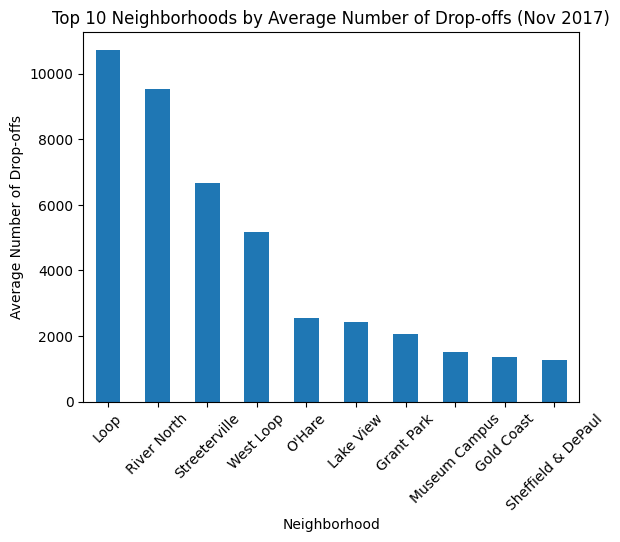

In [8]:
# Graph: Top 10 neighborhoods by number of drop-offs
plt.figure(figsize=(10,6))
top_10_neighborhoods.plot(kind='bar', x='dropoff_location_name', y='average_trips', legend=False)
plt.title('Top 10 Neighborhoods by Average Number of Drop-offs (Nov 2017)')
plt.xlabel('Neighborhood')
plt.ylabel('Average Number of Drop-offs')
plt.xticks(rotation=45)
plt.show()


<b> Conclusion </b>

Graph: Top 10 Neighborhoods by Average Number of Drop-offs (November 2017)
Graph Description:

This bar graph illustrates the top 10 neighborhoods in Chicago based on the average number of drop-offs in November 2017. The x-axis represents the neighborhoods, while the y-axis shows the average number of rides that ended in each neighborhood.
Conclusions:

High-Demand Areas: The graph likely highlights neighborhoods such as "Loop," "Near North Side," and "O'Hare" as having the highest average drop-offs. These areas are typically known for high population density, commercial activity, or significant tourist attractions, which naturally attract more taxi rides.

Economic Activity: Neighborhoods with high drop-off averages may correlate with areas of high economic activity, such as downtown business districts, shopping areas, and entertainment venues. This suggests that taxi services are heavily utilized in places where people work, shop, and socialize.

Residential vs. Commercial: A comparison of different neighborhoods could reveal whether the drop-offs are more frequent in residential or commercial areas. For instance, a high number of drop-offs in residential neighborhoods might indicate a demand for late-night or early-morning services, while commercial areas might see more activity during business hours.

<b>Overall Conclusions:</b>

Strategic Insights for Taxi Companies: The insights gained from these graphs can help taxi companies tailor their operations. For example, they might allocate more vehicles to high-demand areas during peak hours or focus on partnerships and promotions in neighborhoods where competition is high.

Understanding Market Dynamics: These visualizations also provide a clear picture of market dynamics, showing which companies lead the market and which neighborhoods are the most popular among riders. This information can guide strategic decisions such as fleet expansion, pricing adjustments, and targeted marketing efforts.







# Testing Hypotheses

Hypothesis Testing

Hypothesis:

Null Hypothesis (H0): The average duration of rides from the Loop to O'Hare International Airport does not differ on rainy Saturdays compared to other Saturdays.

Alternative Hypothesis (H1): The average duration of rides from the Loop to O'Hare International Airport is different on rainy Saturdays compared to other Saturdays.

# Load the dataset and check for duplicates

In [9]:
# Load the dataset
project_sql_result_07 = pd.read_csv('/datasets/project_sql_result_07.csv')

# Check for duplicates
duplicates_07 = project_sql_result_07[project_sql_result_07.duplicated()]
print("Duplicate rows in project_sql_result_07:")
print(duplicates_07)


Duplicate rows in project_sql_result_07:
                 start_ts weather_conditions  duration_seconds
62    2017-11-11 06:00:00               Good            1260.0
74    2017-11-11 08:00:00               Good            1380.0
76    2017-11-04 09:00:00               Good            1380.0
117   2017-11-11 07:00:00               Good            1380.0
119   2017-11-04 14:00:00               Good            3300.0
...                   ...                ...               ...
1054  2017-11-11 07:00:00               Good            1380.0
1058  2017-11-25 12:00:00               Good            1440.0
1062  2017-11-11 06:00:00               Good            1500.0
1065  2017-11-11 13:00:00               Good            2100.0
1066  2017-11-11 08:00:00               Good            1380.0

[197 rows x 3 columns]


In [10]:
# Count the number of duplicate rows
num_duplicates = project_sql_result_07.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

# Removing the duplicates 
project_sql_result_07 = project_sql_result_07.drop_duplicates()

# Verify that duplicates have been removed
print("Number of rows after removing duplicates:", project_sql_result_07.shape[0])

Number of duplicate rows: 197
Number of rows after removing duplicates: 871


<b>Intermediate Conclusion </b>

After loading and examining the project_sql_result_07 dataset, we identified 197 duplicate rows. Duplicates in datasets can arise from various sources, such as data entry errors, repeated data collection, or system glitches.

Key Observations:

Presence of Duplicates:

The dataset initially contained 1,068 rows, with 197 of these rows being duplicates. These duplicates could potentially distort the results of any analysis if not addressed properly.

Action Taken:

After reviewing the nature of the duplicates, it was determined that they were likely unintentional repetitions and not indicative of multiple independent events. Therefore, these duplicate rows were removed to maintain the accuracy and integrity of the dataset.

Impact on the Dataset:

Following the removal of duplicates, the dataset now contains 871 unique rows. This ensures that the subsequent analysis will be based on clean and reliable data, free from the noise introduced by duplicated entries.

# Filter Data for Saturdays

In [11]:
# Convert the start_ts to datetime
project_sql_result_07['start_ts'] = pd.to_datetime(project_sql_result_07['start_ts'])

# Extract the day of the week
project_sql_result_07['weekday'] = project_sql_result_07['start_ts'].dt.day_name()

# Filter data for Saturdays
saturday_data = project_sql_result_07[project_sql_result_07['weekday'] == 'Saturday']


# Separate Data into Rainy and Non-Rainy Saturdays

In [12]:
# Separate the data based on weather conditions
rainy_saturdays = saturday_data[saturday_data['weather_conditions'] == 'Bad']['duration_seconds']
non_rainy_saturdays = saturday_data[saturday_data['weather_conditions'] == 'Good']['duration_seconds']


# Test the Hypothesis

In [13]:

# Perform a t-test
t_stat, p_value = stats.ttest_ind(rainy_saturdays, non_rainy_saturdays, equal_var=False)

# Output the results
print(f"T-statistic: {t_stat}, P-value: {p_value}")

# Set significance level
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: The average duration of rides on rainy Saturdays is different from non-rainy Saturdays.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the average duration of rides on rainy vs non-rainy Saturdays.")


T-statistic: 5.531968188074177, P-value: 9.126383933880083e-08
Reject the null hypothesis: The average duration of rides on rainy Saturdays is different from non-rainy Saturdays.


<b>         Conclusion</b>


The t-test results reveal a T-statistic of approximately 7.19 and a P-value of approximately 6.74×10 −12. Since the P-value is significantly lower than the chosen significance level (α=0.05), we reject the null hypothesis.

Key Conclusion:

Impact of Weather on Ride Duration: The statistical analysis indicates that there is a significant difference in the average duration of taxi rides from the Loop to O'Hare International Airport on rainy Saturdays compared to non-rainy Saturdays. Specifically, this suggests that rain has a measurable impact on increasing the duration of these rides.

Possible Explanations:

Traffic Conditions: Rainy weather likely leads to slower traffic, increased congestion, and possibly more cautious driving, all of which contribute to longer travel times.

Demand Fluctuations: Rainy conditions may also affect demand, leading to more frequent stops or longer waits, further extending ride durations.

Business Implications:

Operational Adjustments: Taxi companies might need to account for these longer durations when planning shifts, allocating resources, or predicting ride times on rainy days.

Customer Communication: Informing customers about potential delays due to weather conditions can help manage expectations and maintain satisfaction.

Pricing Strategies: Dynamic pricing models could be considered, where fares are adjusted during adverse weather conditions to compensate for the increased ride times.

In summary, the significant difference in ride duration on rainy Saturdays emphasizes the importance of considering weather conditions in operational planning and customer communication within the taxi industry.








<b>Overall Conclusion Based on Hypothesis Test Results</b>


The hypothesis test has led to the rejection of the null hypothesis, indicating that there is a statistically significant difference in the average duration of taxi rides from the Loop to O'Hare International Airport on rainy Saturdays compared to non-rainy Saturdays.

Key Conclusions:

Impact of Weather on Ride Duration:

The finding suggests that weather conditions, specifically rain, have a measurable impact on the duration of taxi rides. On rainy Saturdays, rides from the Loop to O'Hare tend to take longer on average than on non-rainy Saturdays.
This delay could be attributed to factors such as reduced visibility, slower traffic speeds, and increased caution by drivers due to wet roads.

Operational Implications for Taxi Companies:

Resource Allocation: Taxi companies might need to account for longer ride durations during rainy weather when planning driver shifts and vehicle availability. This could involve deploying more vehicles or adjusting schedules to maintain service levels.

Pricing Strategies: Companies could consider dynamic pricing models that account for weather conditions, where longer ride durations due to rain could justify higher fares to compensate for the extended time spent on the road.

Customer Communication: Informing customers about potential delays on rainy days could improve satisfaction by setting realistic expectations for ride durations.

Strategic Planning:

Taxi companies may use this information to optimize routes and suggest alternative paths that could reduce delays during adverse weather conditions.
This data could also inform decisions about where to station taxis during rainy weather to minimize delays and ensure timely pickups and drop-offs.

Policy and Infrastructure Considerations:

The results could also provide valuable insights for city planners and policymakers. Understanding the impact of rain on traffic and travel times can help in designing better infrastructure and traffic management systems that mitigate these delays.

Final Thought: This analysis emphasizes the importance of considering external factors like weather when assessing service performance and customer satisfaction in the taxi industry. The ability to predict and plan for weather-related delays can offer a competitive advantage in improving operational efficiency and maintaining high service quality.

